<a href="https://colab.research.google.com/github/Baze-Bai/XAI/blob/HW1/HW1_note/Assignment2_Baze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment 2
### Description
### Zejun(Baze) Bai

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data


# Clone the specific branch (HW1) of the GitHub repository to colab workspace
repo_name = "XAI_HW1"  # Change to your repo name
git_path = 'https://github.com/Baze-Bai/XAI.git'  # Root repository path
branch_name = "HW1"  # Replace with your branch name
!git clone --branch "{branch_name}" --single-branch "{git_path}" "{repo_name}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'HW1_note'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

In [ ]:
from google.colab import userdata
userdata.get('secretName')

In [ ]:
# install pygam which is not included in colab
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


# Import the required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import pointbiserialr
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from pygam import LogisticGAM, s, l

# Exploratory Data Analysis

## Overview of the data

In [ ]:
df = pd.read_csv('data.csv')
print(df.head())
print(df.info())
print(df.describe(include='all'))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## View the distribution of churn

In [ ]:
print(df.head())
print(df.info())
print(df.describe(include='all'))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## EDA for classification features


Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64


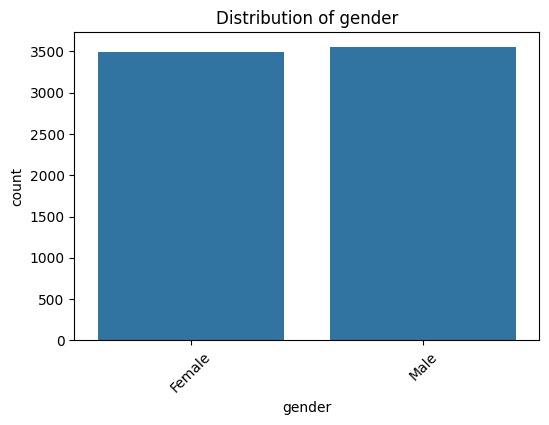

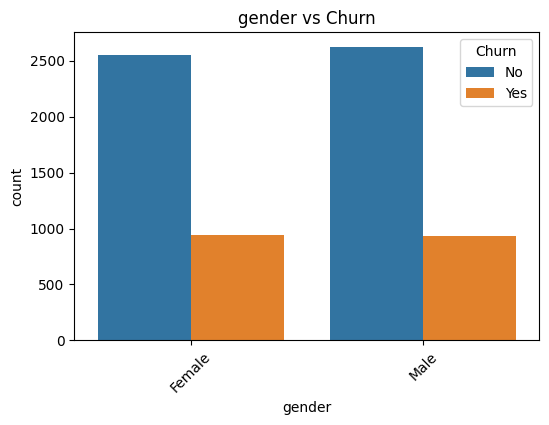

Cross Tab:
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Chi-square test for gender: chi2=0.48, p-value=0.4866

Column: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


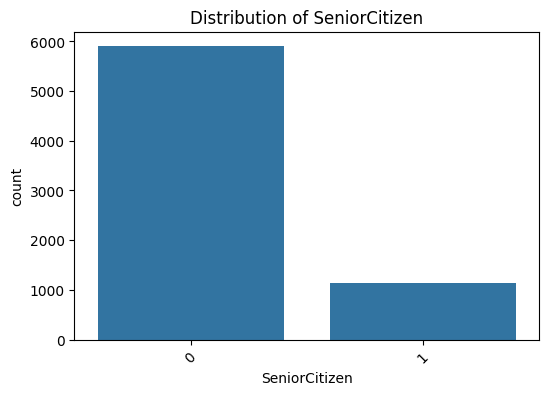

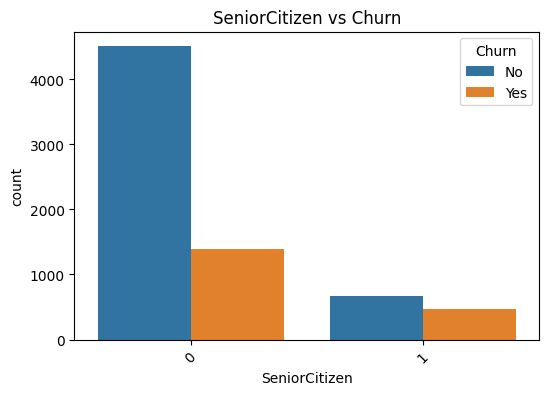

Cross Tab:
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476
Chi-square test for SeniorCitizen: chi2=159.43, p-value=0.0000

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64


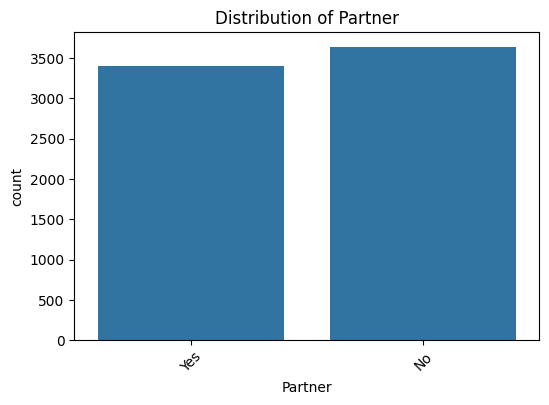

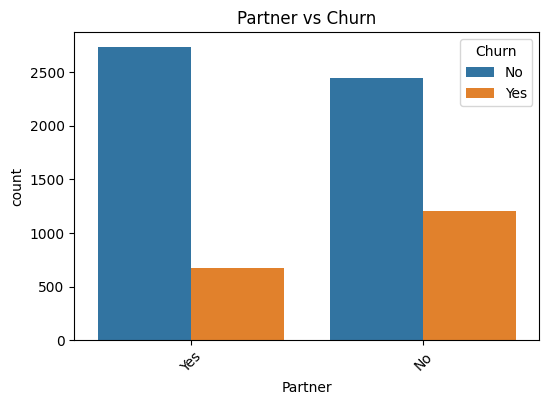

Cross Tab:
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
Chi-square test for Partner: chi2=158.73, p-value=0.0000

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


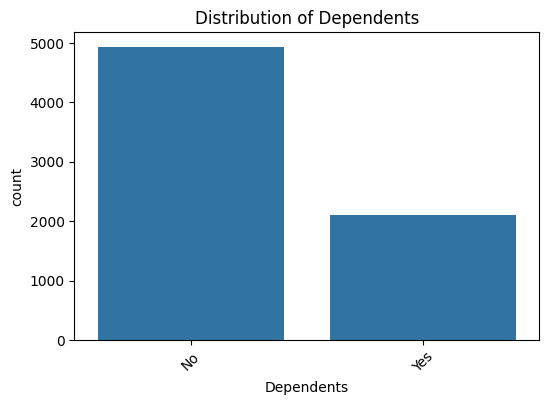

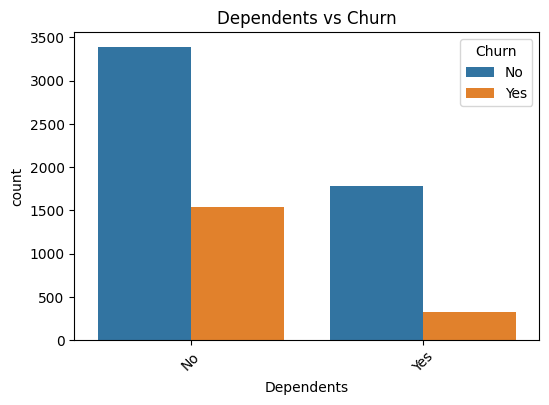

Cross Tab:
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
Chi-square test for Dependents: chi2=189.13, p-value=0.0000

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


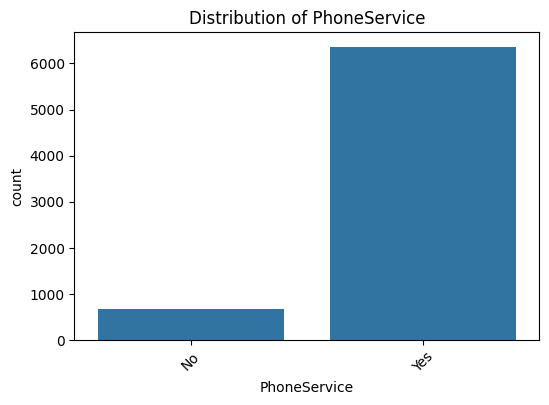

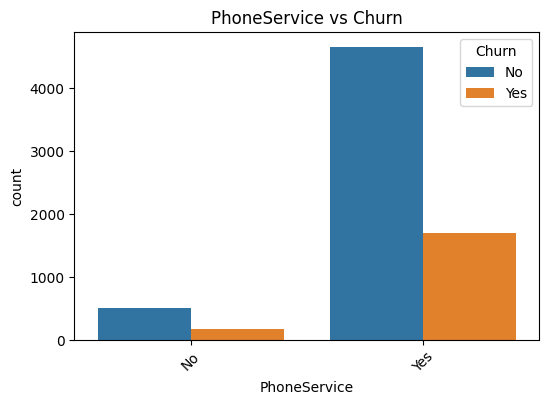

Cross Tab:
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699
Chi-square test for PhoneService: chi2=0.92, p-value=0.3388

Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


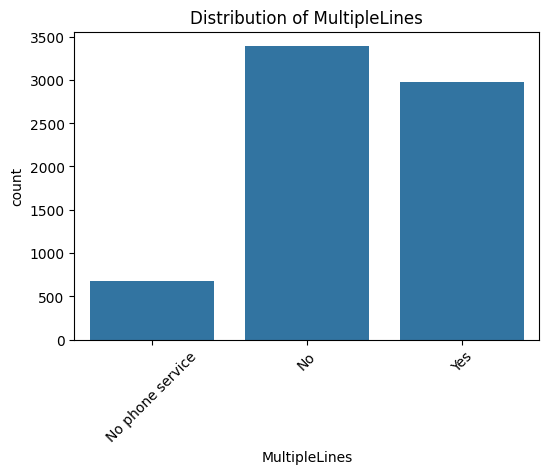

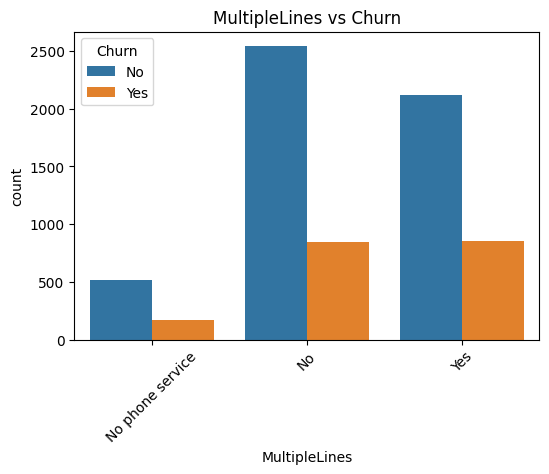

Cross Tab:
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850
Chi-square test for MultipleLines: chi2=11.33, p-value=0.0035

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


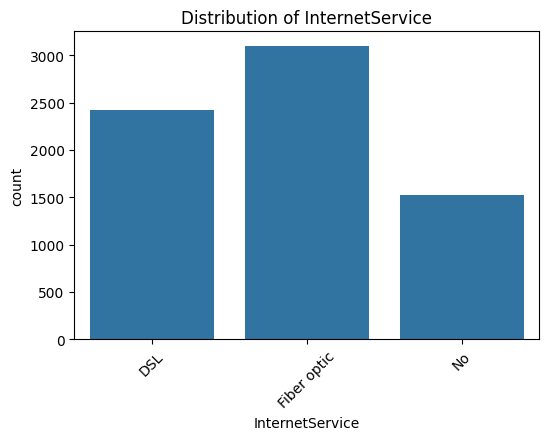

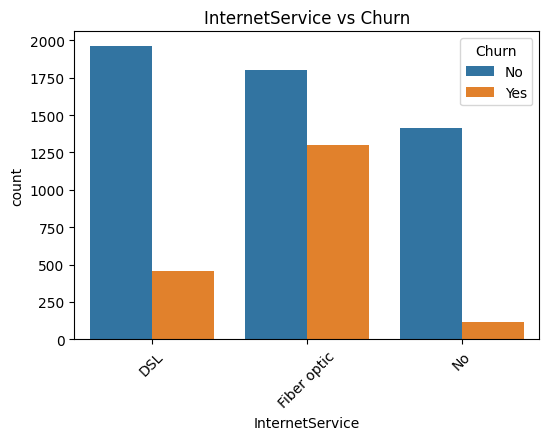

Cross Tab:
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113
Chi-square test for InternetService: chi2=732.31, p-value=0.0000

Column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


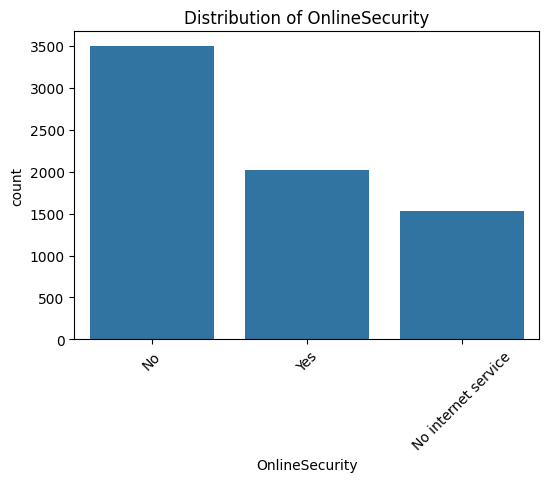

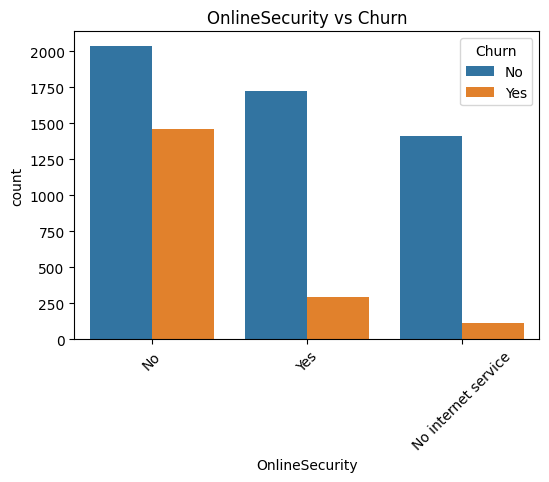

Cross Tab:
Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295
Chi-square test for OnlineSecurity: chi2=850.00, p-value=0.0000

Column: OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


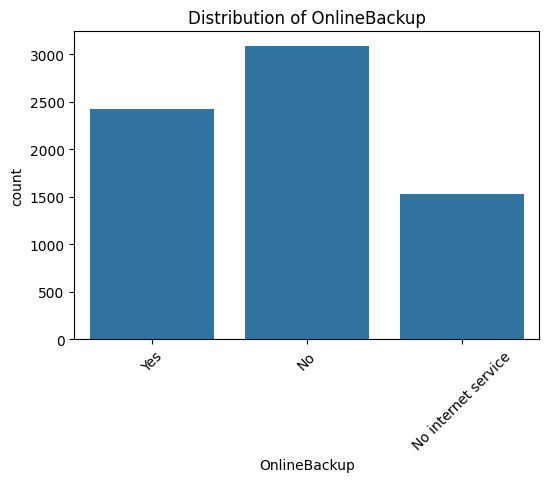

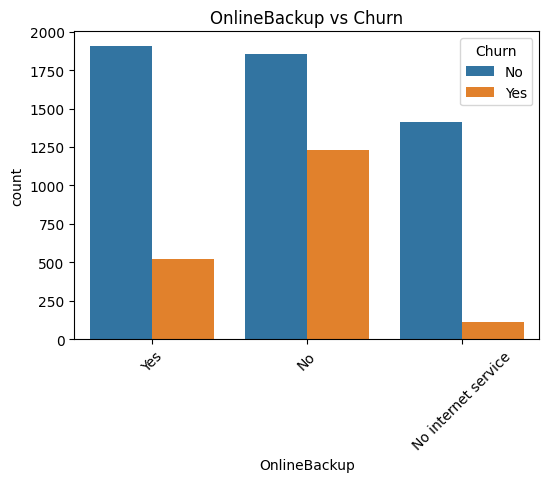

Cross Tab:
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523
Chi-square test for OnlineBackup: chi2=601.81, p-value=0.0000

Column: DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


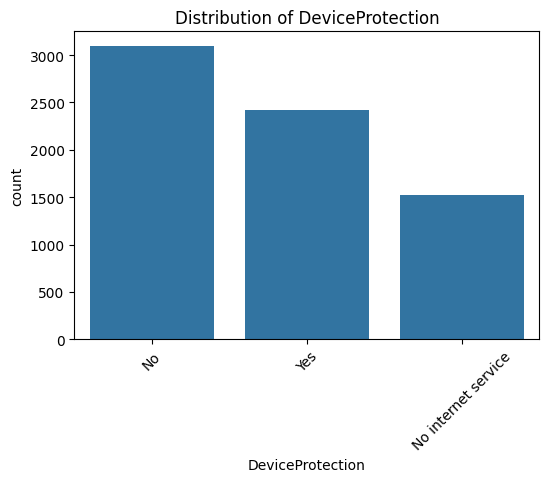

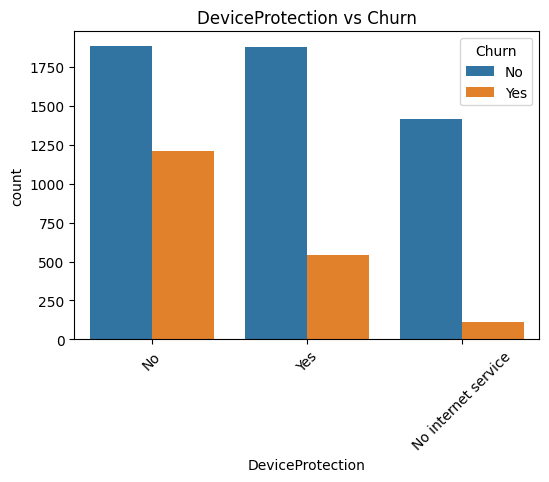

Cross Tab:
Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545
Chi-square test for DeviceProtection: chi2=558.42, p-value=0.0000

Column: TechSupport
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


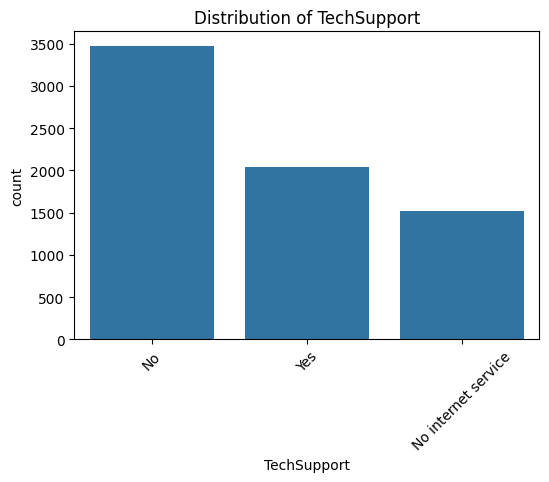

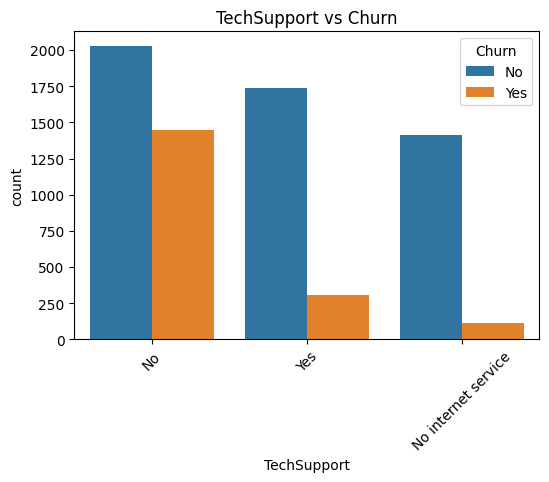

Cross Tab:
Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310
Chi-square test for TechSupport: chi2=828.20, p-value=0.0000

Column: StreamingTV
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


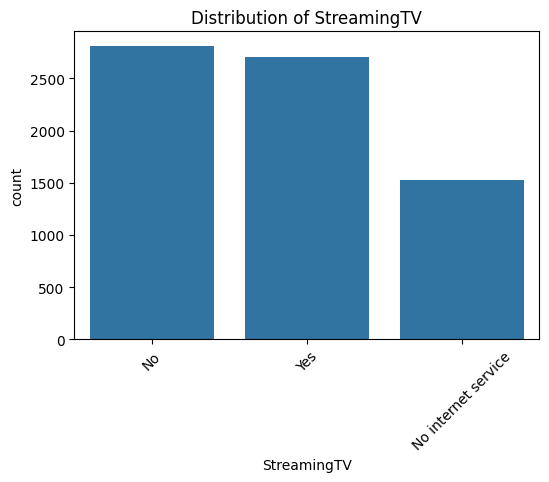

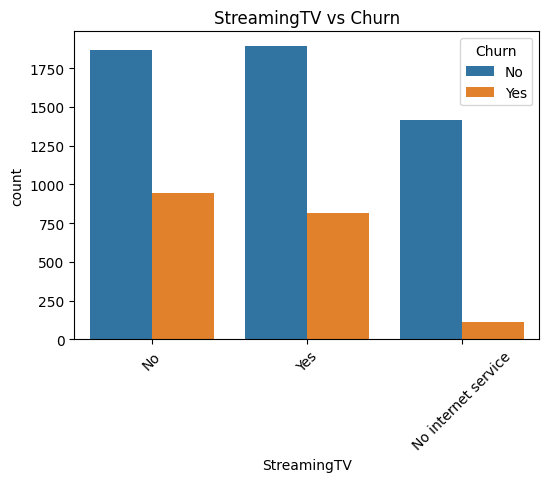

Cross Tab:
Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814
Chi-square test for StreamingTV: chi2=374.20, p-value=0.0000

Column: StreamingMovies
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


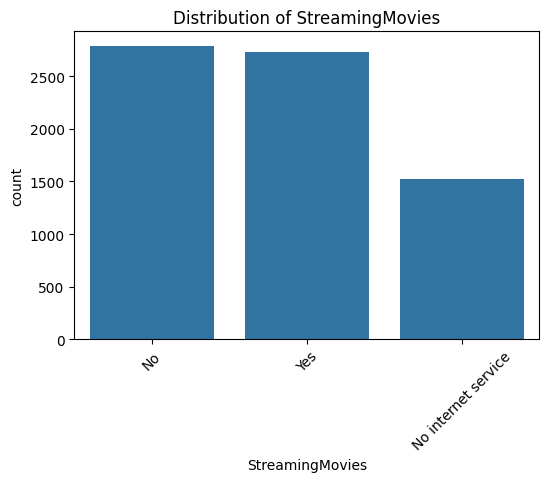

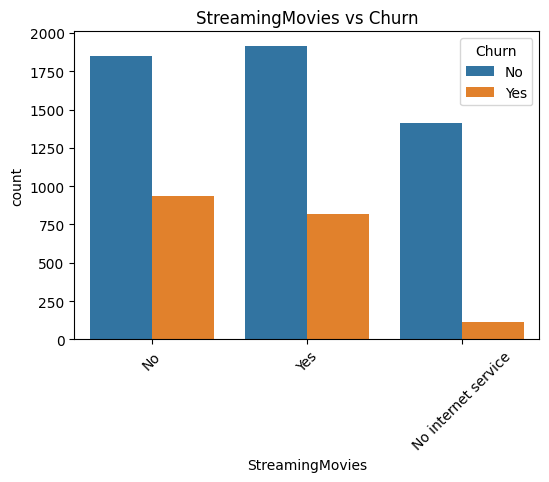

Cross Tab:
Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818
Chi-square test for StreamingMovies: chi2=375.66, p-value=0.0000

Column: Contract
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


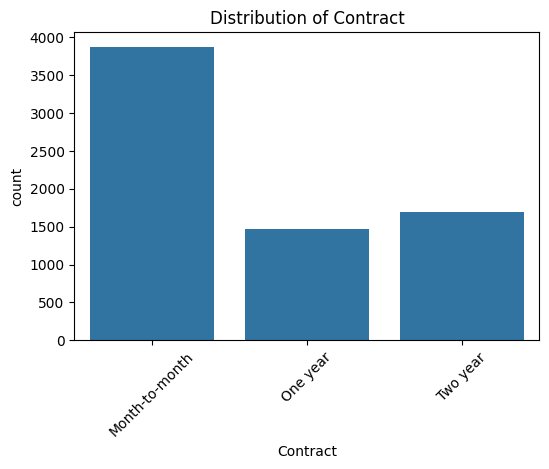

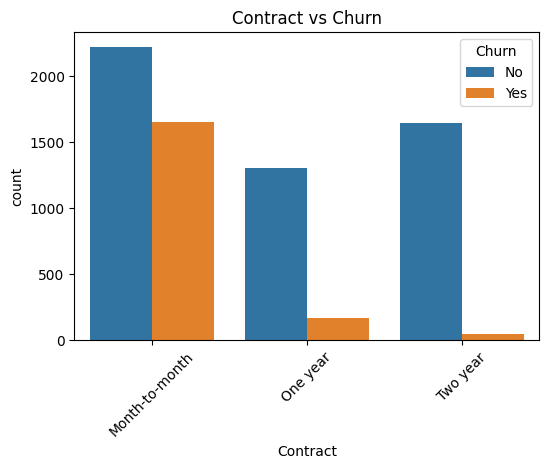

Cross Tab:
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48
Chi-square test for Contract: chi2=1184.60, p-value=0.0000

Column: PaperlessBilling
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


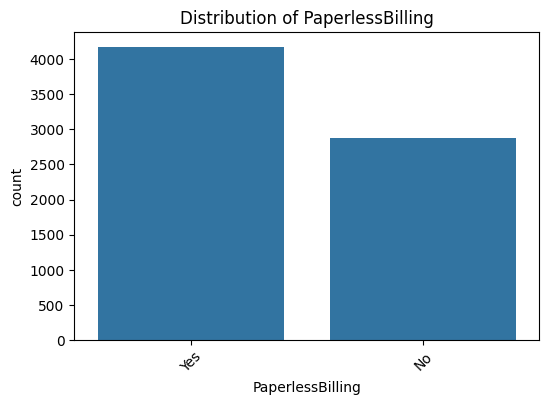

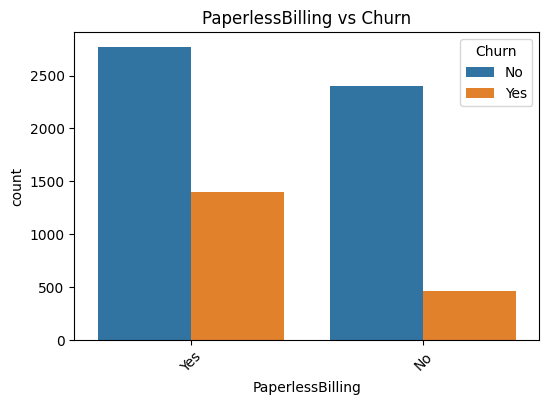

Cross Tab:
Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400
Chi-square test for PaperlessBilling: chi2=258.28, p-value=0.0000

Column: PaymentMethod
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


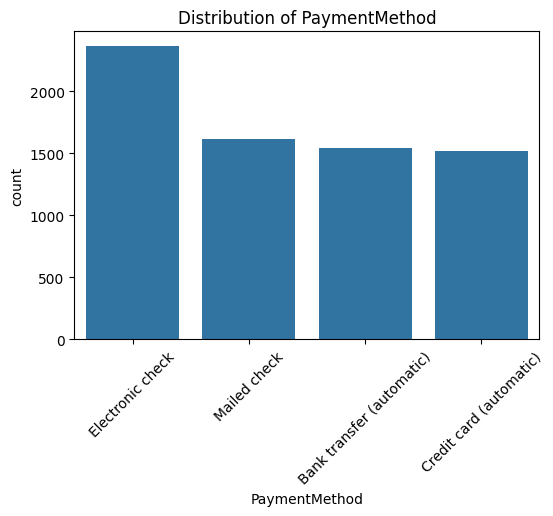

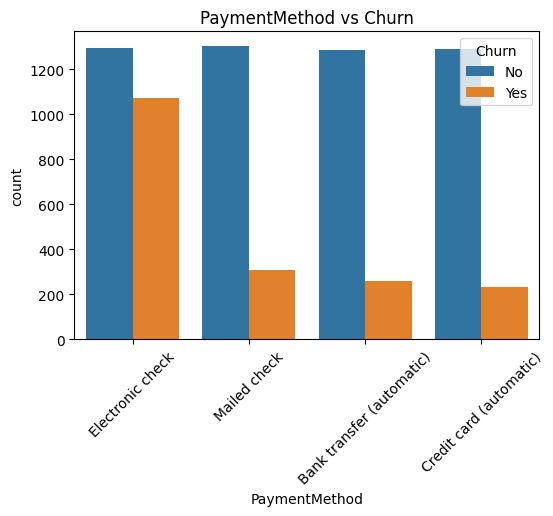

Cross Tab:
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Chi-square test for PaymentMethod: chi2=648.14, p-value=0.0000

Column: Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64


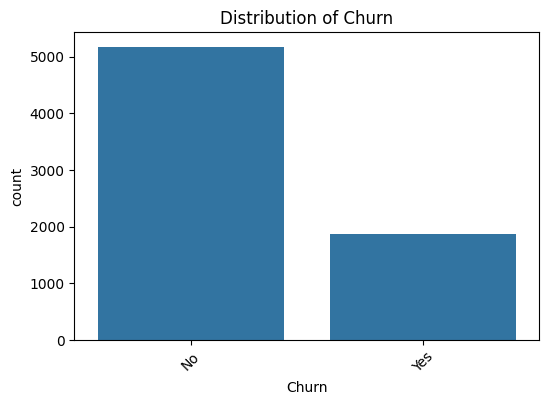

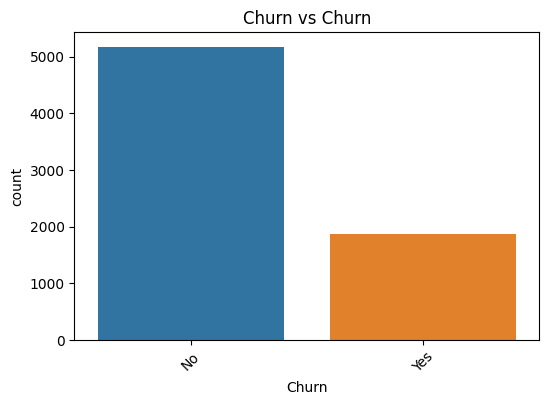

Cross Tab:
Churn    No   Yes
Churn            
No     5174     0
Yes       0  1869
Chi-square test for Churn: chi2=7037.87, p-value=0.0000


In [ ]:
# Remove meaningless variable cutomerID, and numeric variables
cat_cols = df.columns.tolist()
col_remove = ['customerID', 'tenure', 'MonthlyCharges', "TotalCharges"]
cat_cols = [col for col in cat_cols if col not in col_remove]

for col in cat_cols:
    # 1) View the category count for each feature
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))

    # 2) Plot the distribution
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

    # 3) View the distribution of churn in different categories
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

    # 4) Simple crosstab
    cross_tab = pd.crosstab(df[col], df['Churn'])
    print("Cross Tab:")
    print(cross_tab)

    # Chi-square test
    from scipy.stats import chi2_contingency
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    print(f"Chi-square test for {col}: chi2={chi2:.2f}, p-value={p:.4f}")

# EDA for Numerical features

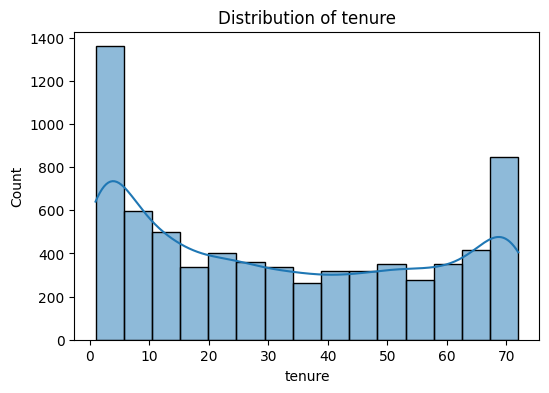

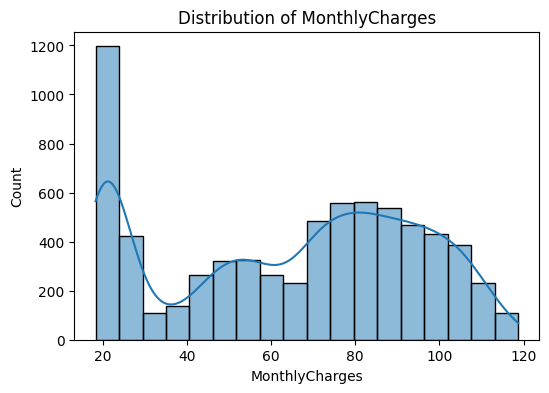

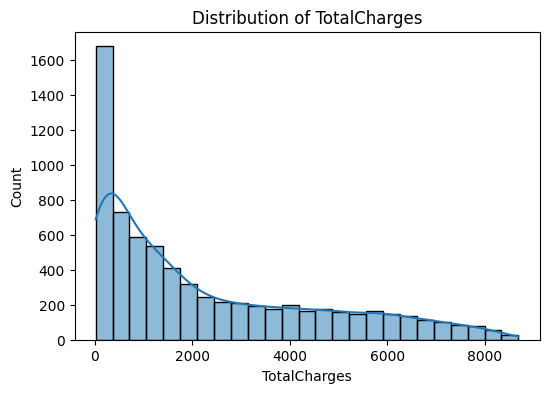

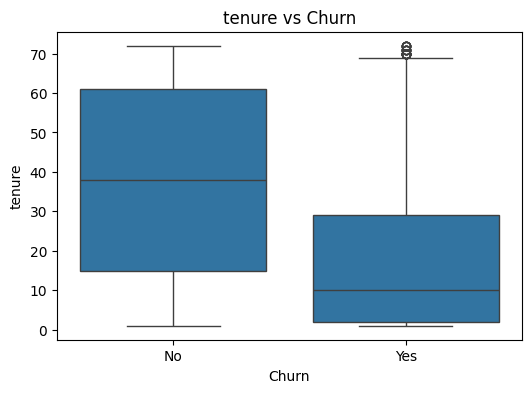

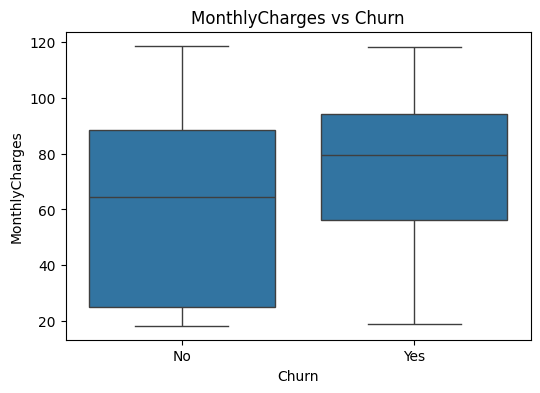

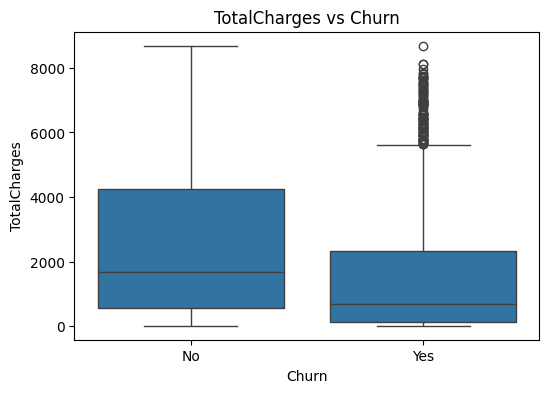

Feature: tenure
  Point-Biserial Correlation (r) = -0.3540
  p-value = 9.43765e-207
----------------------------------------
Feature: MonthlyCharges
  Point-Biserial Correlation (r) = 0.1929
  p-value = 6.76084e-60
----------------------------------------
Feature: TotalCharges
  Point-Biserial Correlation (r) = -0.1995
  p-value = 4.87687e-64
----------------------------------------


<ipython-input-57-a7da3a58715b>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correlation, p_value = pointbiserialr(df[col], df["Churn"].replace({"Yes": 1, "No": 0}))


In [ ]:
num_cols = ['tenure', 'MonthlyCharges', "TotalCharges"]
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dropna(inplace=True)

# View the distribution of numerical features
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# View the relationship between numerical features and churn
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

# Calculate the biserial correlation coefficient
for col in num_cols:
    correlation, p_value = pointbiserialr(df[col], df["Churn"].replace({"Yes": 1, "No": 0}))
    print(f"Feature: {col}")
    print(f"  Point-Biserial Correlation (r) = {correlation:.4f}")
    print(f"  p-value = {p_value:.6g}")
    print("-" * 40)

From the above visualizations and statistics, we can see the revelances between features and target(Churn). The assumption of Linear Regression isn't met. Since the Churn is binary variable, but for Linear Regression, it should be continous.
The assumptions of Logistic Regression and GAM are met. Since the featuresFeatures are independent of each other and most of them have significant correlation with Churn.

# Preprocess the features

In [ ]:
# One-encoding for classification variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Standardlize numeric variables
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Drop the meaningless feature customerID
df_encoded = df_encoded.drop('customerID', axis=1)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Split the dataset, set 20% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# Build Linear Regression Model

In [ ]:

# Fitting Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

# Evaluation
y_pred = lr.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse_lin:.4f}")
print(f"Linear Regression R-squared: {r2_lin:.4f}")

Coefficients: [-0.0483335  -0.01679352 -0.09230207  0.00116086  0.04110445 -0.00144711
 -0.01687999 -0.0179667   0.0179667   0.05643122  0.18751269 -0.02174289
 -0.02174289 -0.0495467  -0.02174289 -0.01557885 -0.02174289 -0.00285112
 -0.02174289 -0.04476407 -0.02174289  0.06099562 -0.02174289  0.05691627
 -0.11295279 -0.08358037  0.03896092 -0.00794049  0.06685476 -0.00246576]
Intercept: 0.1950861705131492
Linear Regression MSE: 0.1334
Linear Regression R-squared: 0.3081


# Interprete Linear regression
The coefficients represent the influence of different features, from the coefficients shown above we can see the most of the coefficients are very small, which means most of the features can not make a significant influence on the prediction. Besides, MSE and R2 represent the how well the model fits. The MSE is high and R2 is low. And the predictio is not 0 or 1. The prediction is a float, so this model is not suitable.

# Build Logistic Regression

In [ ]:
# Fitting Logistic Regression
LGR = LogisticRegression()
LGR.fit(X_train, y_train)

y_pred_prob = LGR.predict_proba(X_test)[:, 1]
y_pred_class = LGR.predict(X_test)

# evaluation
acc = accuracy_score(y_test, y_pred_class)
cm = confusion_matrix(y_test, y_pred_class)
report = classification_report(y_test, y_pred_class)

print(f"Logistic Regression Accuracy: {acc:.4f}")
print("Logistic Regression Confusion Matrix:\n", cm)
print("Logistic Regression Classification Report:\n", report)

# corfficients
coeffs = LGR.coef_[0]
intercept = LGR.intercept_[0]
print("Logistic Regression Intercept:", intercept)
print("Logistic Regression Coefficients:", coeffs)

# 计算OR
odds_ratios_sklearn = np.exp(coeffs)
print("Odds Ratios:", odds_ratios_sklearn)


Logistic Regression Accuracy: 0.8294
Logistic Regression Confusion Matrix:
 [[956  84]
 [156 211]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.92      0.89      1040
        True       0.72      0.57      0.64       367

    accuracy                           0.83      1407
   macro avg       0.79      0.75      0.76      1407
weighted avg       0.82      0.83      0.82      1407

Logistic Regression Intercept: -1.2298690770207397
Logistic Regression Coefficients: [-1.49377722 -0.12908408  0.78144887  0.00561255  0.19789497 -0.00400442
 -0.12593835 -0.54271291  0.06318483  0.27914047  0.83390375 -0.12083464
 -0.12083464 -0.39142745 -0.12083464 -0.14452305 -0.12083464 -0.04573018
 -0.12083464 -0.33458761 -0.12083464  0.26527208 -0.12083464  0.23555004
 -0.6747045  -1.37105329  0.29985877 -0.10908776  0.29644587 -0.02180203]
Odds Ratios: [0.22452298 0.87890007 2.18463522 1.00562833 1.21883437 0.99600359

# Interprete Logistic regression
OR represents the exp(coefficient), it is the same meaning as the coefficients but more stragihtforward. In Logistic Regression, the coefficients are larger than Linear Regression. And it can predict the labels straightly. It is based on Linear Regression with extra sigmoid function. The accuracy is high. And it performs well on confusion matrix. In summary, Logistic Regression performs better than Linear Regression.

# Build Generalized Additive Model


In [ ]:
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-1.280248,-1.161694,-0.994194,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0.064303,-0.260878,-0.173740,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,-1.239504,-0.363923,-0.959649,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0.512486,-0.747850,-0.195248,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,-1.239504,0.196178,-0.940457,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
# Build model
n_features = X_train.shape[1]

print(n_features)
terms = []
for i in range(n_features):
    if i < 3:
        # use linear term for numeric variables
        terms.append(l(i))
    else:
        # use sum term for Categorical features
        terms.append(s(i))

print(terms)
# accumulate the terms
gam_formula = terms[0]
for t in terms[1:]:
    gam_formula += t

# build and train LogisticGAM
gam = LogisticGAM(gam_formula).fit(X_train, y_train)

# Print the coefficients
coefs = gam.coef_
print("All coefficients (including intercept and spline basis):\n", coefs)

# Evaluation
y_pred = gam.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion matrix, classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

30
[l(0), l(1), l(2), s(3), s(4), s(5), s(6), s(7), s(8), s(9), s(10), s(11), s(12), s(13), s(14), s(15), s(16), s(17), s(18), s(19), s(20), s(21), s(22), s(23), s(24), s(25), s(26), s(27), s(28), s(29)]
All coefficients (including intercept and spline basis):
 [-1.51827209e+00 -5.85226282e-01  8.13932405e-01 -5.50025181e-02
 -5.46657334e-02 -5.43289495e-02 -5.39921747e-02 -5.36554181e-02
 -5.33186875e-02 -5.29819894e-02 -5.26453288e-02 -5.23087097e-02
 -5.19721344e-02 -5.16356041e-02 -5.12991189e-02 -5.09626773e-02
 -5.06262766e-02 -5.02899130e-02 -4.99535812e-02 -4.96172750e-02
 -4.92809865e-02 -4.89447069e-02 -4.86084282e-02 -1.61872863e-01
 -1.50286541e-01 -1.38700219e-01 -1.27113910e-01 -1.15527625e-01
 -1.03941376e-01 -9.23551692e-02 -8.07690083e-02 -6.91828956e-02
 -5.75968313e-02 -4.60108136e-02 -3.44248393e-02 -2.28389042e-02
 -1.12530032e-02  3.32869443e-04  1.19187197e-02  2.35045536e-02
  3.50903766e-02  4.66761941e-02  5.82620098e-02 -4.94592716e-02
 -4.97059848e-02 -4.995

# Interprete Generalized Additive Model
In GAM, every variable is fit by a function, then the various functions are assembled to fit the training data. From the above information, we can see that GAM performs almost the same as Logistic Regression on accuracy and confusion matrix. Through the coefficients we can know the influence that every variable makes on the prediction. GAM can capture more complex patterns. But the explainability of GAM is less than that of Logistic Regression. In this case, the relationship between features and labels are not very complicated and nearly linear. So it doesn't perform very well.

# Discussion
The Linear Regression can not predict the labels directly, it is not suitable for this classification task. Logistic Regression is more simple than GAM, need less computational resource and has more explainability. GAM can capture more complex patterns in feature data. But in this case, the relationship between features and labels are not very complicated. GAM and Logistic Regression has almost the same performance.

# Recommadation
I would recommand Logistic Regression to this company. Since the Logistic Regression can achieve same even better performance than GAM but consume less computational resource and more easy to interpret. Linear Regression doesn't fit this situation, since it can not predict the labels directly, it needs a sigmoid function to generate the categories.